<a href="https://colab.research.google.com/github/Melissa-cv/Primer-Proyecto/blob/main/Primer_Proyecto_Biose%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Primer Proyecto Semestral  </center></font></h2>
<h4><font color='0B5345'>
<center></center>
<center>Julian Olaya-Melissa Cadavid</center>
</font></h4>

<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>


Electromiografía: El EMG es un estudio sobre conducción nerviosa que busca medir la actividad eléctrica que hay en los músculos y los nervios, este estudio mide principalmente la rápidez y la eficacia con que las señales eléctricas se transmiten por el nervio, mostrando si hay un daño o problema muscular y/o nervioso.

Se caracteriza por:
1. Regustrar la actividad eléctrica de los músculos durante contracción y reposo.
2. Se puede realizar de dos formas diferentes, la primera es colocar electrodos sobre el músculo de interes por encima de la piel, la segunda es con electrodos de aguja que se incertan directamente en el músculo, en este caso el procedimiento es invasivo.
3. En algunos estudios de EMG se aplican estímulos eléctricos a los nervios para evaluar que este funcionando de forma correcta o si presenta algún daño.


El operador de transformadas de Energía de Káiser (TKEO), se utiliza generalmente en el procesamiento de señales para estimar las características de frecuencia de una señal, esta técnica suele utilizarse para señales no estacionarias como lo es la EMG(las señales estudiadas en este proyecto), suele utilizarse para leer este tipo de señales ya que es muy sensible a los cambios bruscos de energía como los que suelen darse por las contracciones musculares, también puede amplificar componentes de alta frecuencia de la señal, lo que suele servir para identificar la fatiga muscular.

El TKEO se calcula con la señal de entrada, a la cual se le hace una diferenciación y suavizado, con el fin de que se pueda resaltar los picos de la actividad muscular.

Para interpretar estos resultados es necesario caracterizar la actividad muscular en diferentes situaciones, para esto se observa los puntos donde la magnitud de la señal es máxima que representan los instantes en los que la actividad muscular es más pronunciada,  unos niveles altos de TKEO significa alta actividad muscular, si son bajos, entonces hay menor actividad muscular, cuando hay un aumento repentino, puede significar que hay una contracción muscular, y cuando hay una disminución gradual, significa que hay fatiga muscular.

referencias

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4434004/

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving emg+data+for+gestures.zip to emg+data+for+gestures (1).zip


In [ ]:
print(uploaded.keys())

dict_keys(['emg+data+for+gestures (1).zip'])


Después de cargar los archivos podemos notar que es una base de datos de gran tamaño, por lo tanto, elegimos un rango de datos de 1000 porque esto nos permite tener una buena visualización de los datos y su comportamiento, además de facilitar para el programa los análisi.

In [ ]:
emg_data = 'emg+data+for+gestures (1).zip'
diccionario_archivos = {}
with zipfile.ZipFile(io.BytesIO(uploaded[emg_data]), 'r') as referencia:
    for archivo in referencia.namelist():
        if archivo.endswith('.txt'):
            contenido = referencia.read(archivo)
            diccionario_archivos[archivo] = contenido

for archivo, contenido in diccionario_archivos.items():
    print(f"Contenido del archivo {archivo}:")
    print(contenido.decode('utf-8')[:1000])
    print()


Contenido del archivo EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt:
time	channel1	channel2	channel3	channel4	channel5	channel6	channel7	channel8	class
1	1e-05	-2e-05	-1e-05	-3e-05	0	-1e-05	0	-1e-05	0
5	1e-05	-2e-05	-1e-05	-3e-05	0	-1e-05	0	-1e-05	0
6	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
7	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
8	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
9	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
10	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
11	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
12	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
13	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
14	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
15	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
16	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
17	-1e-05	1e-05	2e-05	0	1e-05	-2e-05	-1e-05	1e-05	0
18	-1e-05	-1e-05	-6e-05	-5e-05	-3e-05	-3e-05	-2e-05	-2e-05	0
19	-1e-05	-1e-05	-6e-05	-5e-05	-3e-05	-3e-05	-2e-05	-

En el código anterior se muestra que los archivos estan conformados por 8 canales, sin embargo en el canal 8 no todos los usuarios realizaron el movimiento, por lo tanto no hay datos para algunos de ellos los datos representan lo siguiente:


1.   datos sin marcar
2.   mano en reposo
3.   mano apretada en un puño
4.   flexión de muñeca
5.   extensión de muñeca
6.   desviaciones radiales
7.   desviaciones cubitales
8.   palma extendida




In [ ]:
def array_archivos(diccionario_archivos):
    original = {}

    for nombre_archivo, contenido in diccionario_archivos.items():
        numeros = [float(x) for x in contenido.decode('utf-8').strip().split() if x.replace('.', '', 1).isdigit() or x.startswith('-') and x.replace('-', '', 1).replace('.', '', 1).isdigit()]
        signal = np.array(numeros)
        original[nombre_archivo] = signal

    return original

In [ ]:
def teager_energy_operator(diccionario_archivos):

    tkeo_signals = {}

    for nombre_archivo, contenido in diccionario_archivos.items():
        datos = [float(x) for x in contenido.decode('utf-8').strip().split() if x.replace('.', '', 1).isdigit() or x.startswith('-') and x.replace('-', '', 1).replace('.', '', 1).isdigit()]
        signal = np.array(datos)

        tkeo_signal = np.square(signal) - np.roll(signal, -1) * np.roll(signal, 1)
        tkeo_signal[0] = tkeo_signal[1]
        tkeo_signal[-1] = tkeo_signal[-2]

        tkeo_signals[nombre_archivo] = tkeo_signal

    return tkeo_signals



La ecuación de TKEO se basa en que X[n]^2 es la energía de la señal en un instante n, mientras que los otros terminos x[n−1]*x[n+1] se utiliza como una especie de filtro que elimina los componentes de baja frecuencia y resalta los cambios bruscos de la señal, esto es importante para poder analizar el estudio de EMG que se basa en observar estos cambios.

In [ ]:
tkeo_resultados = teager_energy_operator(diccionario_archivos)

for nombre_archivo, tkeo_normalizado in tkeo_resultados.items():
    print(f"nombre del archivo al que se ha ingresado: {nombre_archivo}")
    print(tkeo_normalizado)
    print()

nombre del archivo al que se ha ingresado: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.31130126e+09
  4.31136692e+09  4.31136692e+09]

nombre del archivo al que se ha ingresado: EMG_data_for_gestures-master/01/2_raw_data_13-13_22.03.16.txt
[-12. -12.  36. ...   0.   0.   0.]

nombre del archivo al que se ha ingresado: EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.55397562e+09
 1.44000000e-08 1.44000000e-08]

nombre del archivo al que se ha ingresado: EMG_data_for_gestures-master/02/2_raw_data_14-21_22.03.16.txt
[0.0000e+00 0.0000e+00 0.0000e+00 ... 6.6236e+00 1.0000e-08 1.0000e-08]

nombre del archivo al que se ha ingresado: EMG_data_for_gestures-master/03/1_raw_data_09-32_11.04.16.txt
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.45414798e+09
 1.44000000e-08 1.44000000e-08]

nombre del archivo al que se ha ingresado: EMG_data_for_gestures-

In [ ]:
original = array_archivos(diccionario_archivos)

Se utiliza para normalizar la señal el método mininimo y máximo que busca ajustar los datos a un rango especifico para facilitar la comparación y la interpretación, se calcula ambos datos de la señal y luego utiliza la formula:
(x - min_val) / (max_val - min_val), o en algunos casos se utiliza la función de python MinMaxScaler().

Es importante normalizar los datos ya que limpia la información de cierta forma haciendola más clara, entendible y delimitada.

In [ ]:
def normalize_min_max(signal):
    min_val = min(signal)
    max_val = max(signal)
    normalized_signal = [(x - min_val) / (max_val - min_val) for x in signal]
    return normalized_signal

tkeo_resultados_normalizados = {}

for nombre_archivo, tkeo_signal in tkeo_resultados.items():
    size = 1000
    n_signal = []
    for i in range(0, len(tkeo_signal), size):
        p = tkeo_signal[i:i+size]
        normalized_p = normalize_min_max(p)
        n_signal.extend(normalized_p)
    tkeo_resultados_normalizados[nombre_archivo] = n_signal

for nombre_archivo, tkeo_normalizado in tkeo_resultados_normalizados.items():
    print(f"Nombre del archivo: {nombre_archivo}")

    print(tkeo_normalizado[:1000])
    print()


Nombre del archivo: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt
[0.45305435811166017, 0.45305435811166017, 0.45305435811166017, 0.45305435811166017, 0.45320038785499833, 0.45305435811166017, 0.45305435811166017, 0.45305435811166017, 0.4532646409420671, 0.45305435811166017, 0.45305435811166017, 0.4533405764086029, 0.45305435811166017, 0.45305435811166017, 0.4534281942546058, 0.45305435811166017, 0.45305435811166017, 0.4535274944800757, 0.45305435811166017, 0.45305435811166017, 0.45363847708501265, 0.45305435811166017, 0.45305435811166017, 0.4537611420694167, 0.45305435811166017, 0.45305435811166017, 0.4538954894332878, 0.45305435811166017, 0.45305435811166017, 0.4540415191766259, 0.45305435811166017, 0.45305435811166017, 0.45419923129943107, 0.45305435811166017, 0.45305435811166017, 0.4543686258017033, 0.45305435811166017, 0.45305435811166017, 0.4545497026834426, 0.45305435811166017, 0.45305435811166017, 0.4547424619446489, 0.45305435811166017, 0.45305435811166017, 0.4

In [ ]:
array_resultados = array_archivos(diccionario_archivos)

for nombre_archivo, original in array_resultados.items():
    print(f"Archivo: {nombre_archivo}")
    print(original)
    print()

Archivo: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt
[1.0000e+00 0.0000e+00 0.0000e+00 ... 0.0000e+00 6.5661e+04 0.0000e+00]

Archivo: EMG_data_for_gestures-master/01/2_raw_data_13-13_22.03.16.txt
[2. 0. 6. ... 0. 0. 0.]

Archivo: EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt
[1.0000e+00 0.0000e+00 0.0000e+00 ... 7.4525e+04 1.2000e-04 0.0000e+00]

Archivo: EMG_data_for_gestures-master/02/2_raw_data_14-21_22.03.16.txt
[ 1.e+00  0.e+00  0.e+00 ...  0.e+00 -1.e-04  0.e+00]

Archivo: EMG_data_for_gestures-master/03/1_raw_data_09-32_11.04.16.txt
[ 1.0000e+00  0.0000e+00  0.0000e+00 ...  5.8772e+04 -1.2000e-04
  0.0000e+00]

Archivo: EMG_data_for_gestures-master/03/2_raw_data_09-34_11.04.16.txt
[1. 0. 4. ... 0. 0. 0.]

Archivo: EMG_data_for_gestures-master/04/1_raw_data_18-02_24.04.16.txt
[1. 0. 0. ... 0. 0. 0.]

Archivo: EMG_data_for_gestures-master/04/2_raw_data_18-03_24.04.16.txt
[1.0e+00 0.0e+00 0.0e+00 ... 2.5e-04 1.2e-04 0.0e+00]

Archivo: EMG_data_for

In [ ]:
def normalize_min_max(signal):
    min_val = min(signal)
    max_val = max(signal)
    normalized_signal = [(x - min_val) / (max_val - min_val) for x in signal]
    return normalized_signal

resultados_normalizados1 = {}

for nombre_archivo, original in array_resultados.items():

    size = 1000
    normalized_signal_m = []
    for i in range(0, len(original), size):
        m = original[i:i+size]
        normalized_m = normalize_min_max(m)
        normalized_signal_m.extend(normalized_m)
    resultados_normalizados1[nombre_archivo] = normalized_signal_m

for nombre_archivo, señal_normalizado in resultados_normalizados1.items():
    print(f"Nombre del archivo: {nombre_archivo}")

    print(señal_normalizado[:100])
    print()

Nombre del archivo: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt
[0.0032682995855230117, 3.267972788244187e-07, 3.267972788244187e-07, 3.267972788244187e-07, 0.01634019073849976, 3.267972788244187e-07, 3.267972788244187e-07, 3.267972788244187e-07, 0.019608163526743945, 3.267972788244187e-07, 3.267972788244187e-07, 0.022876136314988135, 3.267972788244187e-07, 3.267972788244187e-07, 0.02614410910323232, 3.267972788244187e-07, 3.267972788244187e-07, 0.029412081891476507, 3.267972788244187e-07, 3.267972788244187e-07, 0.032680054679720696, 3.267972788244187e-07, 3.267972788244187e-07, 0.03594802746796488, 3.267972788244187e-07, 3.267972788244187e-07, 0.03921600025620907, 3.267972788244187e-07, 3.267972788244187e-07, 0.042483973044453255, 3.267972788244187e-07, 3.267972788244187e-07, 0.04575194583269744, 3.267972788244187e-07, 3.267972788244187e-07, 0.04901991862094163, 3.267972788244187e-07, 3.267972788244187e-07, 0.05228789140918582, 3.267972788244187e-07, 3.26797278824418

In [ ]:
def calculos_estadisticos(a):
    calculos = {}

    for nombre_archivo, x in a.items():
        rms = np.sqrt(np.mean(np.square(x)))
        varianza = np.var(x)
        mav = np.mean(np.abs(x))
        mavs = np.mean(np.abs(np.diff(x)))
        signos = np.sign(np.diff(x))
        cambios_signo = np.sum(np.abs(np.diff(signos)))
        wl = np.sum(np.abs(np.diff(x)))
        cruces_cero = np.sum(np.abs(np.diff(np.sign(x)))) / 2

        claves_dic = ['RMS', 'Varianza', 'Valor medio absoluto (MAV)', 'Pendiente del valor absoluto medio (MAVSlope)', 'Cambios en las señales de pendiente (SSC)', 'Longitud de onda (WL)', 'Zero Crossing (ZC)']
        valores_dic = [rms, varianza, mav, mavs, cambios_signo, wl, cruces_cero]
        calculos[nombre_archivo] = dict(zip(claves_dic, valores_dic))

    return calculos



Se crea una función que calcula cada una de las características pedidas a la señla
1. RMS(Root Mean Square): es el cuadrado de los valores que tiene la señal, representa la potencia promedio de la señal
su formula es:
RMS=sqrt( (1/N) * sum(x(n)^2) )
2. Varianza: Mide la dispersión de los valores de la señal al rededor de la media, y en python se puede calcular usando la función de numpy 'var'
3. Mean Absolute Value(MAV): es la medida de la amplitud promedio de la señal.
su formula es:
MAV = (1/N) * sum( |x(n)| )
4. Mean Absolute Value Slope (MAVSlope):Es la medida de la pendiente de la señal en cada punto, básicamente mide la variación de la señal en el tiempo.
su formula es:
MAV Slope = (1 / (N-1)) * sum( |pendiente(n)| )
5. Slope Sing Changes (SSC): Mide la complejidad de la onda de la señal, es decir, saca el número de veces que la pendiente de una señal cambia de forma.
su formula es:

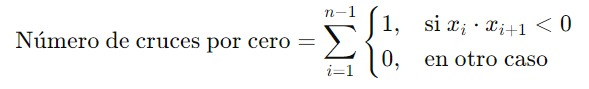
6. Waveform lenght (WL): Mide la duración de la señal.
su formula es:
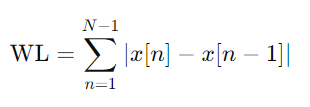
7. Zero Crossing(ZC): Mide la frecuencia de la señal.
Su formula es:
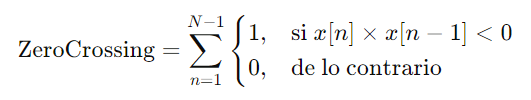




In [ ]:
calculos_resultados = calculos_estadisticos(tkeo_resultados_normalizados)

for nombre_archivo, calculos in calculos_resultados.items():
    print(f"Valores de: {nombre_archivo}:")
    for nombre_calculo, valor in calculos.items():
        print(f"{nombre_calculo}: {valor}")
    print()

Valores de: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt:
RMS: 0.5361225903157899
Varianza: 0.1427590896312243
Valor medio absoluto (MAV): 0.38035291797972043
Pendiente del valor absoluto medio (MAVSlope): 0.29485733819722587
Cambios en las señales de pendiente (SSC): 343662.0
Longitud de onda (WL): 92022.02667797222
Zero Crossing (ZC): 549.0

Valores de: EMG_data_for_gestures-master/01/2_raw_data_13-13_22.03.16.txt:
RMS: 0.5510381409711377
Varianza: 0.1371062646808564
Valor medio absoluto (MAV): 0.4080891668790916
Pendiente del valor absoluto medio (MAVSlope): 0.29273605703099187
Cambios en las señales de pendiente (SSC): 306730.0
Longitud de onda (WL): 81588.46645510774
Zero Crossing (ZC): 680.0

Valores de: EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt:
RMS: 0.5542576776691732
Varianza: 0.1427873434994498
Valor medio absoluto (MAV): 0.40548024582681624
Pendiente del valor absoluto medio (MAVSlope): 0.3140108184112266
Cambios en las señales de pendien

In [ ]:
calculos_resultados1 = calculos_estadisticos(resultados_normalizados1)

for nombre_archivo, calculos in calculos_resultados1.items():
    print(f"Valores de: {nombre_archivo}:")
    for nombre_calculo, valor in calculos.items():
        print(f"{nombre_calculo}: {valor}")
    print()

Valores de: EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt:
RMS: 0.44537984856838403
Varianza: 0.1582767599868564
Valor medio absoluto (MAV): 0.20021600716211554
Pendiente del valor absoluto medio (MAVSlope): 0.40041120532971175
Cambios en las señales de pendiente (SSC): 343170.0
Longitud de onda (WL): 124964.33307134974
Zero Crossing (ZC): 16970.5

Valores de: EMG_data_for_gestures-master/01/2_raw_data_13-13_22.03.16.txt:
RMS: 0.4512393447807877
Varianza: 0.16133977789084689
Valor medio absoluto (MAV): 0.2056141249704107
Pendiente del valor absoluto medio (MAVSlope): 0.4112000150566115
Cambios en las señales de pendiente (SSC): 306047.0
Longitud de onda (WL): 114605.5561964282
Zero Crossing (ZC): 15311.5

Valores de: EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt:
RMS: 0.46161646750092156
Varianza: 0.1668698655518157
Valor medio absoluto (MAV): 0.2149881334311585
Pendiente del valor absoluto medio (MAVSlope): 0.42996002751029505
Cambios en las señales de 

In [ ]:
df = pd.DataFrame(columns=['Archivo', 'TKEO', 'RMS', 'Varianza', 'Mean Absolute Value',
                           'Mean Absolute Value Slope', 'Slope Sign Changes', 'Waveform Length',
                           'Zero Crossings'])


calculos_resultados_tkeo = calculos_estadisticos(tkeo_resultados_normalizados)
for nombre_archivo, calculos in calculos_resultados_tkeo.items():
    df = pd.concat([df, pd.DataFrame({'Archivo': nombre_archivo,
                    'TKEO': 'Con TKEO',
                    'RMS': calculos['RMS'],
                    'Varianza': calculos['Varianza'],
                    'Mean Absolute Value': calculos['Valor medio absoluto (MAV)'],
                    'Mean Absolute Value Slope': calculos['Pendiente del valor absoluto medio (MAVSlope)'],
                    'Slope Sign Changes': calculos['Cambios en las señales de pendiente (SSC)'],
                    'Waveform Length': calculos['Longitud de onda (WL)'],
                    'Zero Crossings': calculos['Zero Crossing (ZC)']}, index=[0])],
                   ignore_index=True)


calculos_resultados_sin_tkeo = calculos_estadisticos(resultados_normalizados1)
for nombre_archivo, calculos in calculos_resultados_sin_tkeo.items():
    df = pd.concat([df, pd.DataFrame({'Archivo': nombre_archivo,
                    'TKEO': 'Sin TKEO',
                    'RMS': calculos['RMS'],
                    'Varianza': calculos['Varianza'],
                    'Mean Absolute Value': calculos['Valor medio absoluto (MAV)'],
                    'Mean Absolute Value Slope': calculos['Pendiente del valor absoluto medio (MAVSlope)'],
                    'Slope Sign Changes': calculos['Cambios en las señales de pendiente (SSC)'],
                    'Waveform Length': calculos['Longitud de onda (WL)'],
                    'Zero Crossings': calculos['Zero Crossing (ZC)']}, index=[0])],
                   ignore_index=True)


print(df)

                                               Archivo      TKEO       RMS  \
0    EMG_data_for_gestures-master/01/1_raw_data_13-...  Con TKEO  0.536123   
1    EMG_data_for_gestures-master/01/2_raw_data_13-...  Con TKEO  0.551038   
2    EMG_data_for_gestures-master/02/1_raw_data_14-...  Con TKEO  0.554258   
3    EMG_data_for_gestures-master/02/2_raw_data_14-...  Con TKEO  0.556006   
4    EMG_data_for_gestures-master/03/1_raw_data_09-...  Con TKEO  0.487425   
..                                                 ...       ...       ...   
141  EMG_data_for_gestures-master/35/1_raw_data_10-...  Sin TKEO  0.428275   
142  EMG_data_for_gestures-master/35/2_raw_data_10-...  Sin TKEO  0.423192   
143  EMG_data_for_gestures-master/36/1_raw_data_13-...  Sin TKEO  0.471225   
144  EMG_data_for_gestures-master/36/2_raw_data_13-...  Sin TKEO  0.472687   
145            EMG_data_for_gestures-master/README.txt  Sin TKEO  0.316106   

     Varianza  Mean Absolute Value  Mean Absolute Value Slope  

En esta parte se realizó un DataFrame para cada archivo del diccionario original y del TKEO con los datos de estadísticas anteriormente calculados, con el DataFrame se busca organizar las filas y columnas, es decir, como una tabla de datos, lo que permite acceder a los datos con mayor facilidad en caso de manipulación.

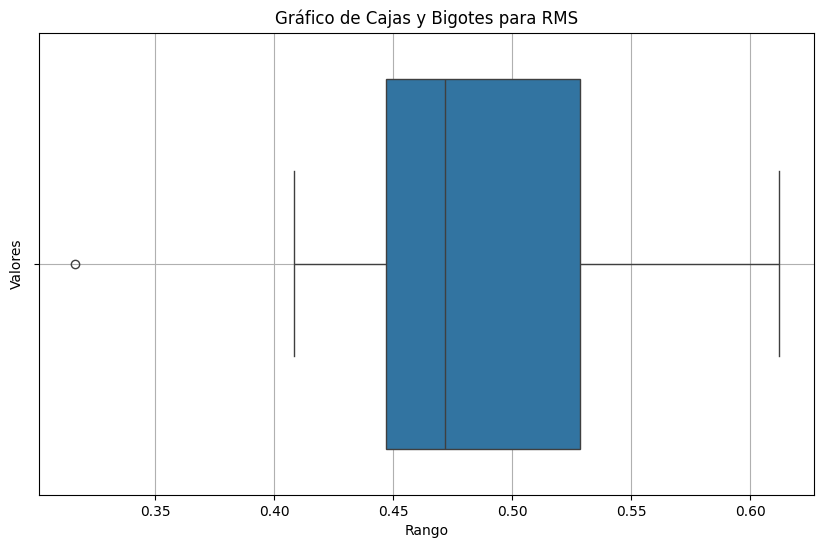

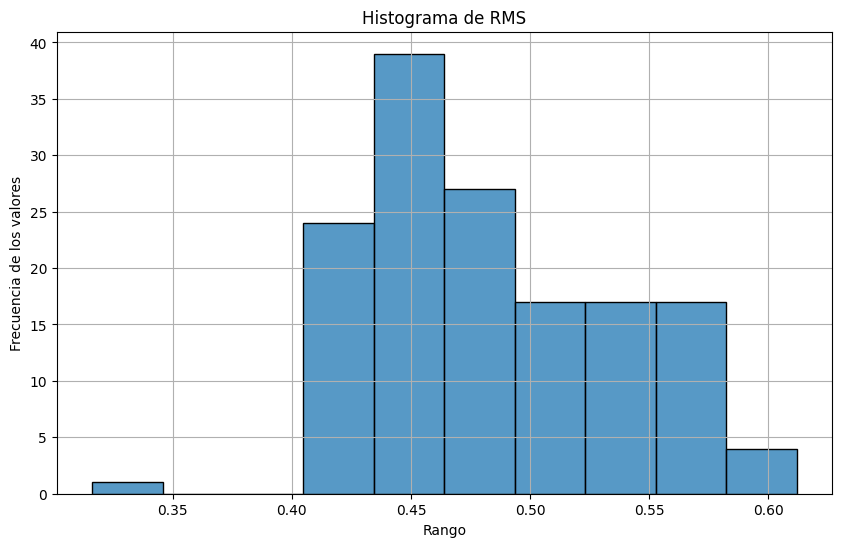


Media de la variable: 0.4844533124933468
Mediana de la variable: 0.47170589673248753


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['RMS'])
plt.title('Gráfico de Cajas y Bigotes para RMS')
plt.xlabel('Rango')
plt.ylabel('Valores')
plt.grid()

plt.figure(figsize=(10, 6))
sns.histplot(data=df['RMS'])
plt.title('Histograma de RMS')
plt.xlabel('Rango')
plt.ylabel('Frecuencia de los valores')
plt.grid(True)
plt.show()

media = df['RMS'].mean()
mediana = df['RMS'].median()
print(f"\nMedia de la variable: {media}")
print(f"Mediana de la variable: {mediana}")

Análisis RMS:

Cajas y bigotes: Se puede observar que en este caso la caja tiene un tamaño de aproximadamente entre 0.9 y 1, es decir que no hay una dispersion considerable, entonces tiene una variabilidad moderada, la línea que se encuentra en la caja indica la mediana, que se encuentra más hacia la izquierda en aproximadamente 0.48, indicando que que la distribución esta sesgada hacia la derecha. Se debe tener en cuenta que los valores representados por un pequeño circulo habla de los datos atípicos, es decir valores que se encuentran muy alejados de la media.

Histograma: Por otro lado el histograma nos muestra que la media se encuentra entre los valores de 45, además también una mayor acumulación de los datos un poco más hacia la derecha. Representando los datos atípicos con una columna alejada de los datos más comunes y de forma mínima.

Cálculo de las variables: en el caso de las variables por medio de las funciones de python tenemos los siguientes resultados Media de la variable: 0.4844533124933468
Mediana de la variable: 0.47170589673248753

Por lo tanto, en nuestro análisis podemos concluir que los datos tienen una variación entre ellos muy mínima, observando además que ambas graficas se comportan de formas muy parecidas, presentando un error muy pequeño.





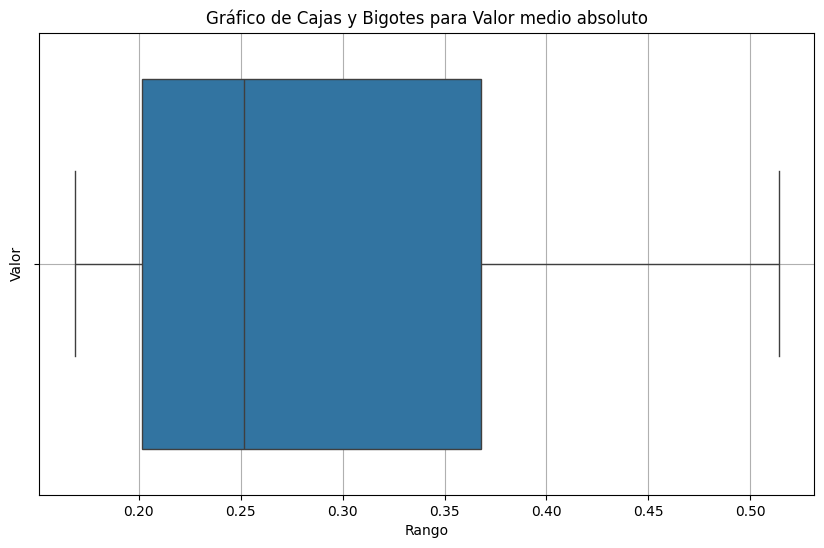

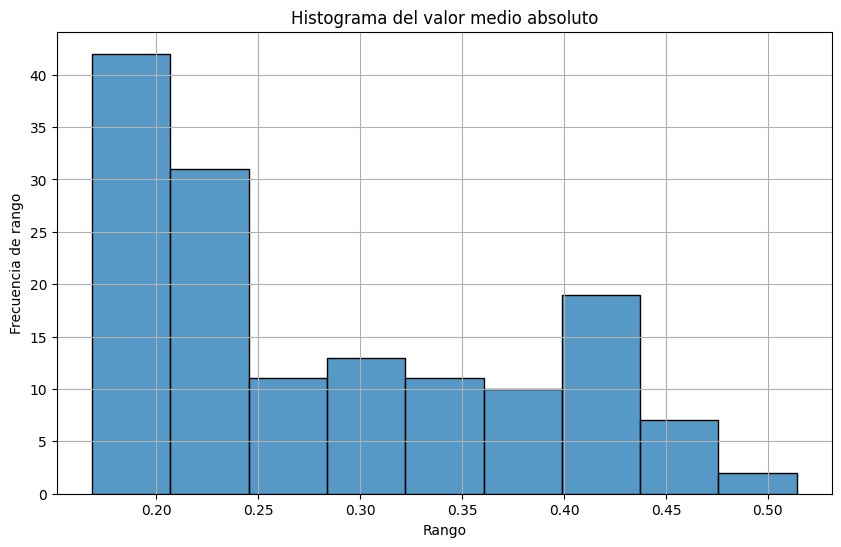


Media de la variable: 0.2815951173737718
Mediana de la variable: 0.25150989531759993


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Mean Absolute Value'])
plt.title('Gráfico de Cajas y Bigotes para Valor medio absoluto')
plt.xlabel('Rango')
plt.ylabel('Valor')
plt.grid()

plt.figure(figsize=(10, 6))
sns.histplot(data=df['Mean Absolute Value'])
plt.title('Histograma del valor medio absoluto')
plt.xlabel('Rango')
plt.ylabel('Frecuencia de rango')
plt.grid()
plt.show()

media = df['Mean Absolute Value'].mean()
mediana = df['Mean Absolute Value'].median()
print(f"\nMedia de la variable: {media}")
print(f"Mediana de la variable: {mediana}")



Análisis Varianza:

Cajas y bigotes: Se puede observar que en este caso la caja tiene un tamaño de aproximadamente de 0.17, es decir, tiene una variabilidad un poco más considerable que los datos anteriores del RMS, por lo tanto mayor dispersión en sus datos, la línea que se encuentra en la caja indica la mediana, que se encuentra más hacia la izquierda en aproximadamente 0.25, indicando que la distribución esta sesgada hacia la derecha. Para esta variable no se encuentran datos atípicos.

Histograma: Por otro lado el histograma nos muestra que la media se encuentra entre los valores de 20, además también una mayor acumulación de los datos un poco más hacia la derecha, Sin embargo debido a que hay mayor dispersión no sé puede observar de forma tan pronunciada como en la variable anterior (RMS)

Cálculo de las variables: en el caso de las variables por medio de las funciones de python tenemos los siguientes resultados: Media de la variable: 0.2815951173737718
Mediana de la variable: 0.25150989531759993

Por lo tanto, en nuestro análisis podemos concluir que los datos tienen una variación entre ellos muy mínima,incluso en el caso de la mediana, los valores calculados por python y los gráficados en el diágrama de cajas y bigotes son iguales, pero en el caso de la media difieren entre ellos aun que no considerablemente.

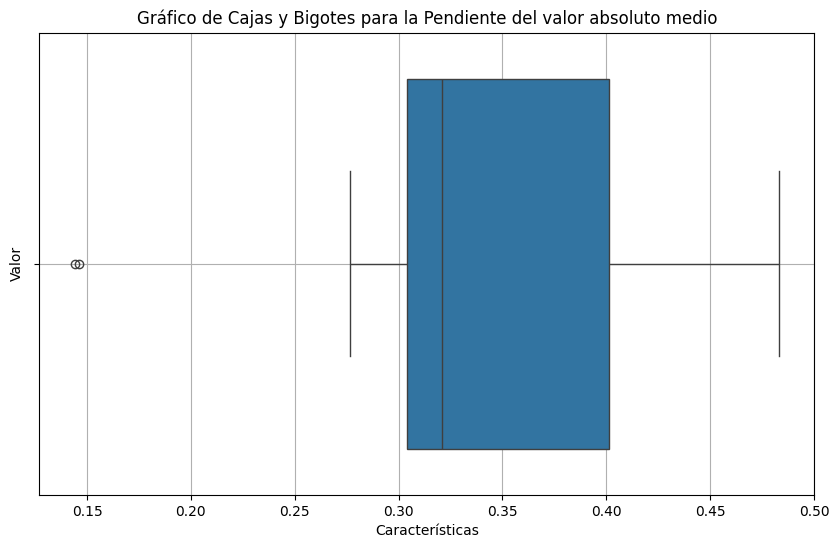

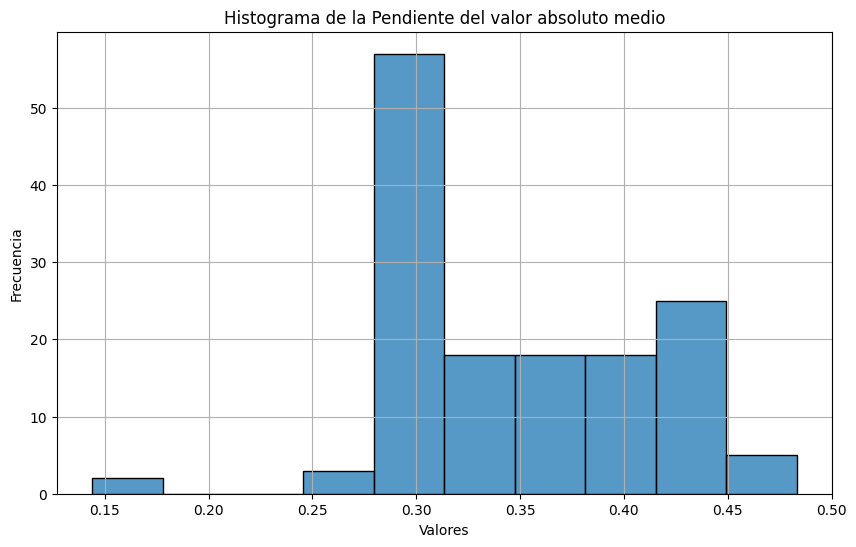


Media de la variable: 0.34882425654021637
Mediana de la variable: 0.3210620230606144


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Mean Absolute Value Slope'])
plt.title('Gráfico de Cajas y Bigotes para la Pendiente del valor absoluto medio')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.grid()

plt.figure(figsize=(10, 6))
sns.histplot(data=df['Mean Absolute Value Slope'])
plt.title('Histograma de la Pendiente del valor absoluto medio')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

media = df['Mean Absolute Value Slope'].mean()
mediana = df['Mean Absolute Value Slope'].median()
print(f"\nMedia de la variable: {media}")
print(f"Mediana de la variable: {mediana}")

Análisis MAV Slope:

Cajas y bigotes: Se puede observar que en este caso la caja tiene un tamaño de aproximadamente entre 0.9, es decir que no hay una dispersion considerable, entonces tiene una variabilidad moderada,se puede observar que la línea de la caja se encuentra más hacia la izquierda en aproximadamente 0.32, indicando que que la distribución esta sesgada hacia la derecha. Se debe tener en cuenta que los valores representados por un pequeño circulo habla de los datos atípicos, es decir valores que se encuentran muy alejados de la media.

Histograma: Por otro lado el histograma nos muestra que la media se encuentra entre los valores de 30, además también una mayor acumulación de los datos un poco más hacia la derecha. Representando los datos atípicos con una columna alejada de los datos más comunes y de forma mínima en aproximadamente 0.15.

Cálculo de las variables: en el caso de las variables por medio de las funciones de python tenemos los siguientes resultados:Media de la variable: 0.34882425654021637
Mediana de la variable: 0.3210620230606144


Por lo tanto, en nuestro análisis podemos concluir que los datos tienen una variación entre ellos muy mínima, entre la caja de bigotes y las variables encontradas por python se puede ver que no hay variación, observando además que ambas graficas se comportan de formas muy parecidas, sin embargo, el histograma esta representando una diferencia mayoy en los datos con respecto a las variables cálculadas.

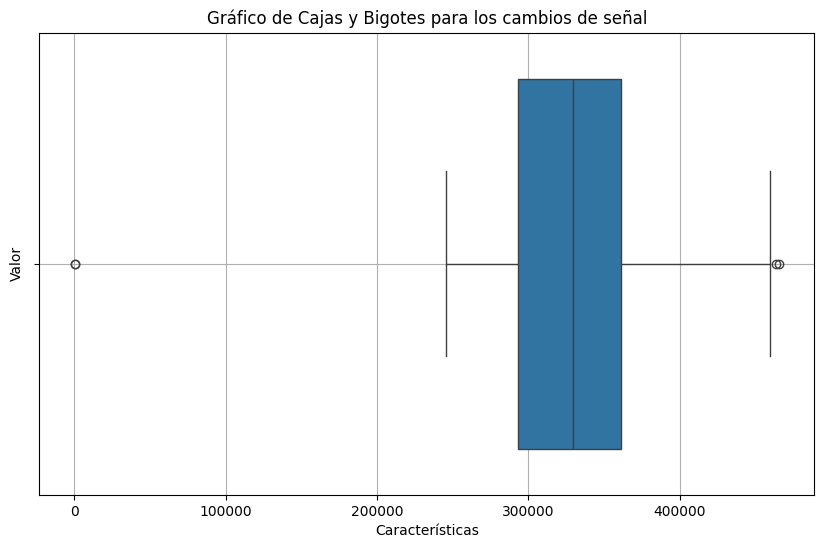

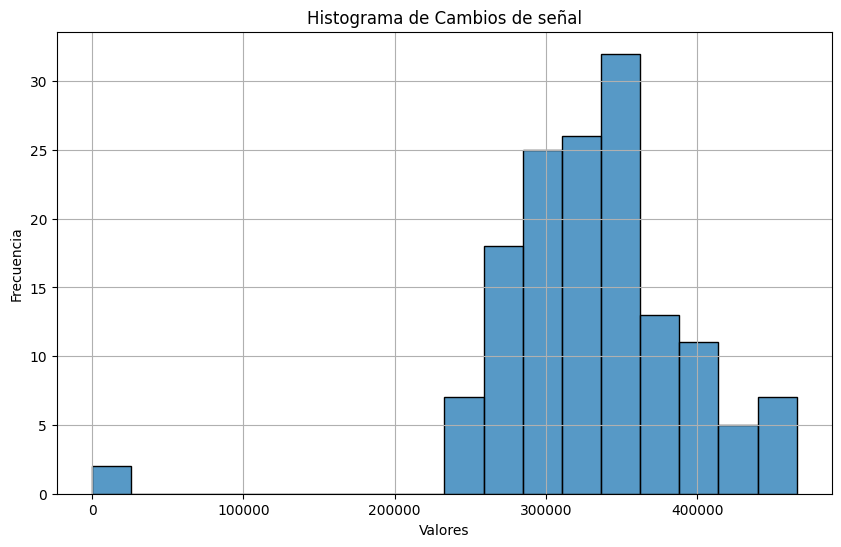


Media de la variable: 329694.602739726
Mediana de la variable: 329749.5


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Slope Sign Changes'])
plt.title('Gráfico de Cajas y Bigotes para los cambios de señal')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.grid()

plt.figure(figsize=(10, 6))
sns.histplot(data=df['Slope Sign Changes'])
plt.title('Histograma de Cambios de señal')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

media = df['Slope Sign Changes'].mean()
mediana = df['Slope Sign Changes'].median()
print(f"\nMedia de la variable: {media}")
print(f"Mediana de la variable: {mediana}")

Análisis SSC:

Cajas y bigotes: Se puede observar que en este caso la caja tiene un tamaño muy pequeño, incluso más que los datos anteriores, por lo tanto, no hay una dispersion considerable, entonces tiene una variabilidad moderada,se puede observar que la línea de la caja se encuentra más central, indicando que la distribución puede presentarse de forma más simétrica. Se debe tener en cuenta que los valores representados por un pequeño circulo habla de los datos atípicos, es decir valores que se encuentran muy alejados de la media.

Histograma: Por otro lado el histograma nos muestra que la media se encuentra entre los valores de 340000 aproximadamente, mostrando un comportamiento muy parecido a la gráfica de cajas y bigotes, donde sus datos medios estan más hacía la derecha.

Cálculo de las variables: en el caso de las variables por medio de las funciones de python tenemos los siguientes resultados: Media de la variable: 329694.602739726
Mediana de la variable: 329749.5

Por lo tanto, en nuestro análisis podemos concluir que los datos tienen una variación entre ellos pequeña, sin embargo, al ser datos de mayor tamaño, estos pueden representar mayor dificultad para comparar entre los encontrados por python y los que se pueden definir por medio de la observación y análisis de la gráfica

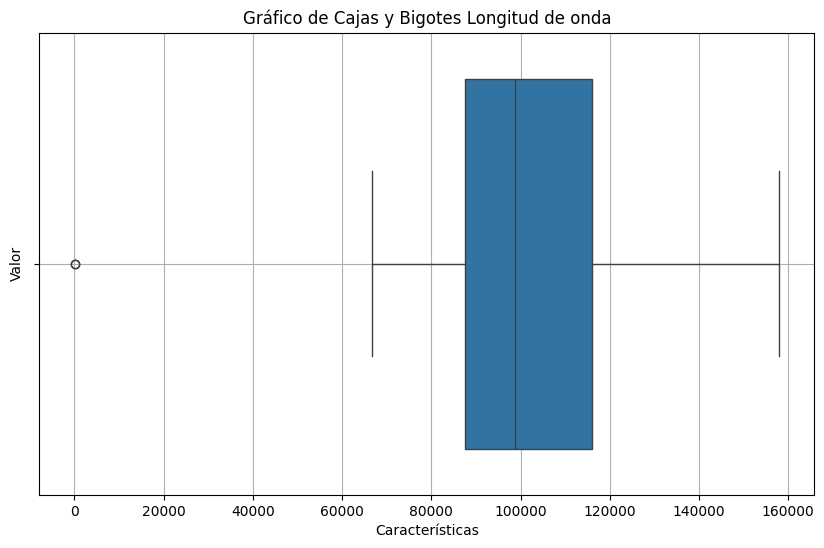

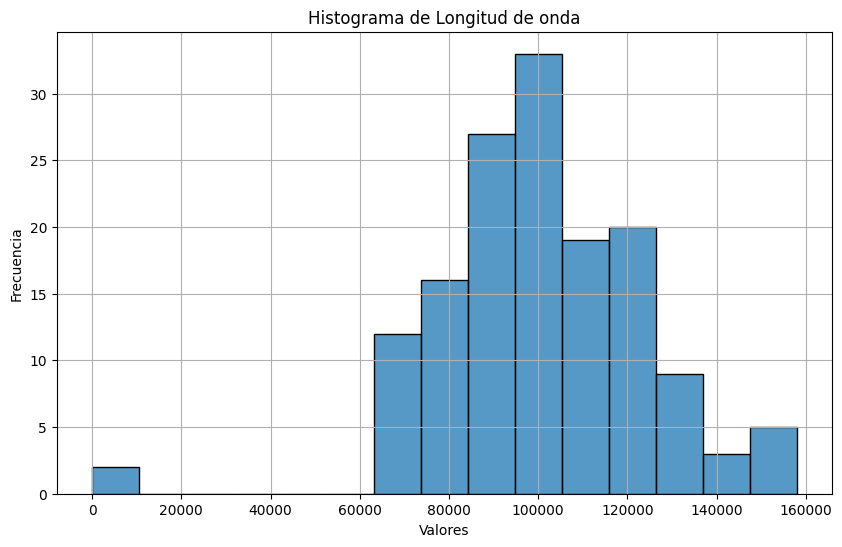


Media de la variable: 100786.09247408641
Mediana de la variable: 98855.4135371616


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Waveform Length'])
plt.title('Gráfico de Cajas y Bigotes Longitud de onda')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.grid()

plt.figure(figsize=(10, 6))
sns.histplot(data=df['Waveform Length'])
plt.title('Histograma de Longitud de onda')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

media = df['Waveform Length'].mean()
mediana = df['Waveform Length'].median()
print(f"\nMedia de la variable: {media}")
print(f"Mediana de la variable: {mediana}")

Análisis WL:

Cajas y bigotes: Se puede observar que en este caso la caja tiene un tamaño muy pequeño, incluso más que los datos anteriores, por lo tanto, no hay una dispersion considerable, entonces tiene una variabilidad moderada,se puede observar que la línea de la caja se encuentra un poco hacía la izquierda, indicando que la distribución puede presentarse sesgada a hacia la derecha. Se debe tener en cuenta que los valores representados por un pequeño circulo habla de los datos atípicos, es decir valores que se encuentran muy alejados de la media.

Histograma: Por otro lado el histograma nos muestra que la media se encuentra en valores de 100000 aproximadamente, mostrando un comportamiento muy parecido a los valores encontrados por python, donde sus datos medios estan más hacía la derecha.

Cálculo de las variables: en el caso de las variables por medio de las funciones de python tenemos los siguientes resultados:Media de la variable: 100786.09247408641
Mediana de la variable: 98855.4135371616


Por lo tanto, en nuestro análisis podemos concluir que los datos tienen una variación entre ellos, sin embargo, al ser datos de mayor tamaño como en el caso anterior, estos pueden representar mayor dificultad para comparar entre los encontrados por python y los que se pueden definir por medio de la observación y análisis de la gráfica.

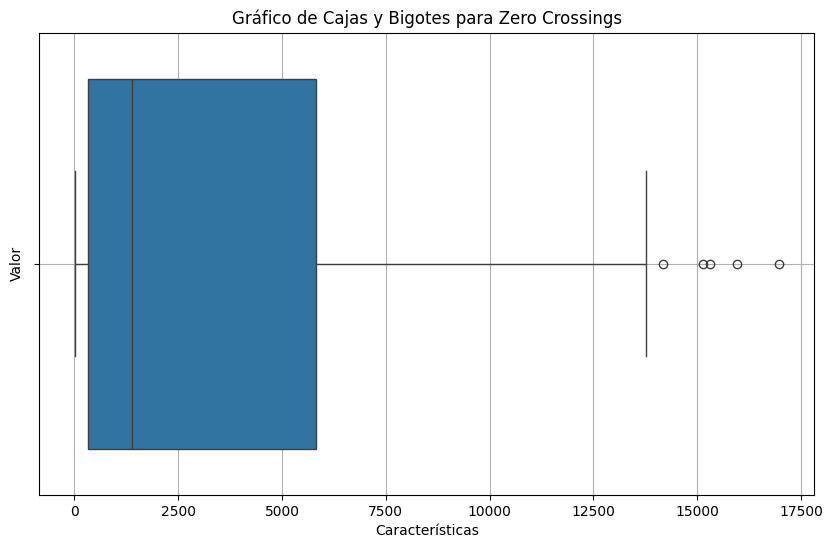

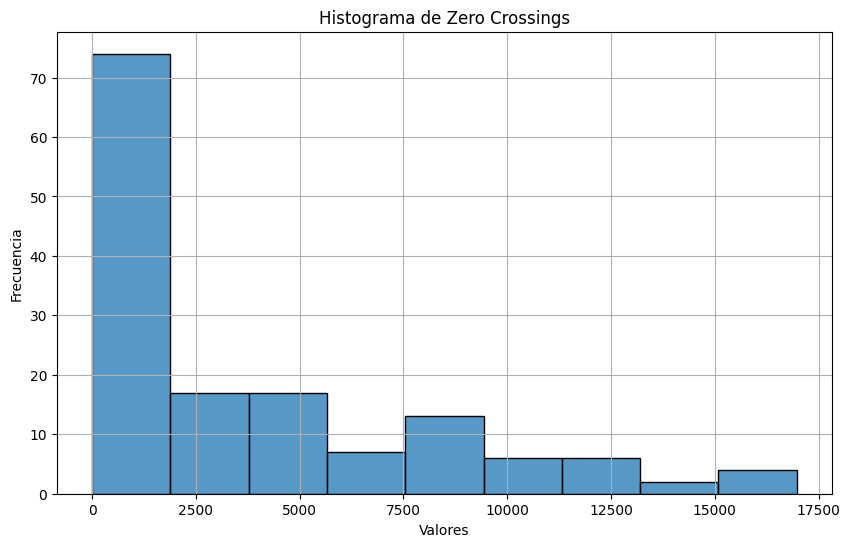


Media de la variable: 3700.77397260274
Mediana de la variable: 1394.0


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Zero Crossings'])
plt.title('Gráfico de Cajas y Bigotes para Zero Crossings')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.grid()


plt.figure(figsize=(10, 6))
sns.histplot(data=df['Zero Crossings'])
plt.title('Histograma de Zero Crossings')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

media = df['Zero Crossings'].mean()
mediana = df['Zero Crossings'].median()
print(f"\nMedia de la variable: {media}")
print(f"Mediana de la variable: {mediana}")

Análisis WL:

Cajas y bigotes: Se puede observar que en este caso la caja tiene un tamaño considerable, es decir puede haber gran dispersión entre los valores de sus datos, además se puede observar gran cantidad de datos atípicos en esta gráfica.

Histograma: En el histograma se confirma lo observado anteriormente en la gráfica de cajas y bigotes, es decir, los datos de este caso se encuentran dispersos, sin embargo se ve una media mayor al rededor de los 0 hasta los 3000 aproximadamente.

Cálculo de las variables: en el caso de las variables por medio de las funciones de python tenemos los siguientes resultados: Media de la variable: 3700.77397260274
Mediana de la variable: 1394.0


Por lo tanto, en nuestro análisis podemos concluir que los datos tienen una variación entre ellos, debido a su dispersión y números de más alto valor los datos no se comparan con fácilidad entre ellos.

In [ ]:
_, p = shapiro(tkeo_signal)
print('valor de la prueba de normalidad de la señal TKEO:',p)

valor de la prueba de normalidad de la señal TKEO: 0.004252925049513578


H0= la señal EMG con TKEO distribuye normal

H1=la señal EMG con TKEO no distribuye normal

Teniendo en cuenta que se toma un valor de significancia de p=0.05 podemos concluir que p< 0.05 por lo tanto se rechaza la hipotesis nula, y se considera que la señal no distribuye normal, este análisis se hizo debido a que para realizar los procedimientos anteriores como gráficar debiamos saber si la señal distribuia de forma normal o no, ya que normalizar estos datos nos ayudaría a realizar unas gráficas más ordenadas y con datos más concretos.

CONCLUSIONES:

1. Se puede concluir que los datos de la señal EMG no distribuyen de forma normal, debido a esto se debe realizar una prueba de normalidad, para lo cual se utilizo la prueba de min-max, con el fin de ordenar los datos y gráficar de forma más concreta.
2. El operador TKEO es una herramienta de ayuda crucial para el análisis de señales como electromiografía (EMG) ya que genera un filtro para aumentar la sensibilidad a los cambios bruscos de energía y asi facilita la detección de contracciones musculares, mientras que su capacidad para resaltar componentes de alta frecuencia permite identificar la fatiga muscular.
3. se puede concluir que la gráfica de cajas y bigotes es una representación de la dispersión y la presencia de valores atípicos en los datos, permitiendo una rápida identificación de la variabilidad y la simetria de la distribución.En el caso del histograma ofrece una representación detallada de la distribución de frecuencias de los datos, revelando patrones de agrupación y densidad en diferentes rangos de valores.
4. Al comparar ambos gráficos con la media y la mediana calculada por python se puede observar que hay mayor precisión entre los valores aproximados de la gráfica de cajas y bigotes, que la que hay entre el histograma y la media, concluyendo así que es más representativo y confiable para el caso de la mediana realizar una gráfica de cajas y bigotes.
5. Los datos que no se normalizan presentan problemas para poder gráficarse debido a la cantidad de dispersión que hay, se pudo observar que las gráficas y los valores de media y mediana calculados sin normalizar no pueden ser usados de forma correcta para diferentes análisis, por lo tanto, se normalizan los datos para realizar el estudio.

REFERENCIAS:

[1] E. Altamira, M. Mayorga y G. Paredes. “Electromiograma (EMG)”. https://www.researchgate.net/. [En línea]. Disponible: https://www.researchgate.net/profile/Eladio-Altamira-Colado/publication/319902318_Electromiograma_EMG/links/59c0cf0ca6fdcca8e572badd/Electromiograma-EMG.pdf

[2] “The effect of weight-bearing exercise and non-weight-bearing exercise on gaitin rats with sciatic nerve crush injury”. PubMed Central (PMC). [En línea]. Disponible: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4434004/

[3]M. Wrobel. “Normalización de la base de datos: Qué es, por qué es importante y cómo se hace”. The Service Desk and IT Service Management blog. [En línea]. Disponible: https://blog.invgate.com/es/normalizacion-de-base-de-datos#:~:text=¿Cómo%20normalizar%20un%20conjunto%20de,o%20la%20normalización%20Z-score.

[4]“R para principiantes”. Home | Bookdown. [En línea]. Disponible: https://bookdown.org/jboscomendoza/r-principiantes4/data-frames.html
